In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.shape

(614, 13)

In [ ]:
df[df.isnull().any(axis=1)].shape

(134, 13)

In [ ]:
col = list(df.columns)
for i in col:
  if df[i].dtype == 'object':
    df[i].fillna(df[i].mode()[0],inplace=True)
  else:
    df[i].fillna(df[i].mean(),inplace=True)

<ipython-input-8-ba7b4706aa1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)
<ipython-input-8-ba7b4706aa1f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
import plotly.express as px

loan_count = df['Loan_Status'].value_counts()
loan_status = px.pie(loan_count,names=loan_count.index, title='Loan Approval Status')
loan_status.show()

In [ ]:
gender_count = df['Gender'].value_counts()
fig = px.bar(gender_count,x=gender_count.index,y=gender_count.values,title='Gender Distribution')
fig.show()

In [ ]:
married_count = df['Married'].value_counts()
fig = px.bar(married_count,x=married_count.index,y=married_count.values,title='Marital Status Distribution')
fig.show()

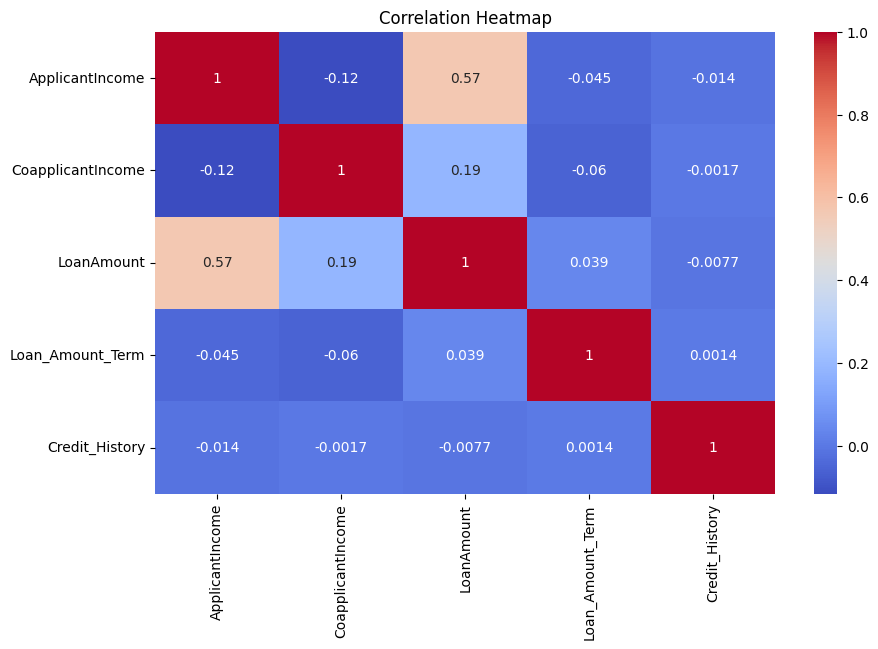

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
fig = px.bar(df,x='Property_Area',title='Property Area Distribution')
fig.show()

In [ ]:
education_count = df['Education'].value_counts()
fig = px.bar(education_count,x=education_count.index,y=education_count.values,title='Education Distribution')
fig.show()

In [ ]:
fig = px.histogram(df,x='ApplicantIncome',nbins=30,title='Distribution of Applicant Income')
fig.show()

In [ ]:
fig = px.scatter(df,x='ApplicantIncome',y='LoanAmount',title='Applicant Income vs Loan Amount',color='Gender')
fig.show()

In [ ]:
fig = px.scatter(df,x='ApplicantIncome',y='LoanAmount',color='Loan_Status',facet_col='Property_Area',
                        title='Applicant Income vs Loan Amount by Property Area')
fig.show()

In [ ]:
num_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for i in num_columns:
    fig = px.box(df,y=i,title=f'Box Plot of {i}')
    fig.show()

In [ ]:
def outliers(df,i):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    out = df[(df[i] < lb) | (df[i] > ub)]
    return out

for i in num_columns:
    out = outliers(df,i)
    print(f'Outliers in {i}:')
    print(out)
    print('\n')

Outliers in ApplicantIncome:
      Loan_ID  Gender Married Dependents Education Self_Employed  \
25   LP001066    Male     Yes          0  Graduate           Yes   
88   LP001289    Male      No          0  Graduate            No   
148  LP001519  Female      No          0  Graduate            No   
152  LP001531    Male      No          0  Graduate            No   
157  LP001543    Male     Yes          1  Graduate            No   
164  LP001572    Male     Yes          0  Graduate            No   
189  LP001647    Male     Yes          0  Graduate            No   
210  LP001708  Female      No          0  Graduate            No   
246  LP001814    Male     Yes          2  Graduate            No   
289  LP001935    Male      No          0  Graduate            No   
319  LP002050    Male     Yes          1  Graduate           Yes   
325  LP002067    Male     Yes          1  Graduate           Yes   
334  LP002103    Male     Yes          1  Graduate           Yes   
350  LP002139    Ma

In [ ]:
fig = px.histogram(df,x='Credit_History', color='Loan_Status',barmode='group',title='Loan_Status vs Credit_His')
fig.show()

In [ ]:
fig = px.histogram(df,x='Property_Area',color='Loan_Status', barmode='group',title='Loan_Status vs Property_Area')
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

le = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred = rf_model.predict(x_test)
print(y_pred)

[1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 0 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [ ]:
svc = SVC()
svc.fit(x_train_scaled,y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but SVC was fitted without feature names



In [ ]:
X_test_df = pd.DataFrame(x_test,columns=x_test.columns)
X_test_df['Loan_Status_Predicted'] = y_pred
X_test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
585,537,1,1,1,0,0,4283,3000.0,172.0,84.0,1.0,0,0
569,522,1,1,0,0,0,3166,2064.0,104.0,360.0,0.0,2,0
255,234,0,0,3,0,0,3083,0.0,255.0,360.0,1.0,0,0
570,523,1,1,1,0,0,3417,1750.0,186.0,360.0,1.0,2,0
529,485,1,0,0,1,0,6783,0.0,130.0,360.0,1.0,1,0
